In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/computers.csv")

In [3]:
data

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74
5,5,87
6,6,96
7,6,97
8,7,109
9,8,119


In [4]:
mean_value = data['Minutes'].mean()

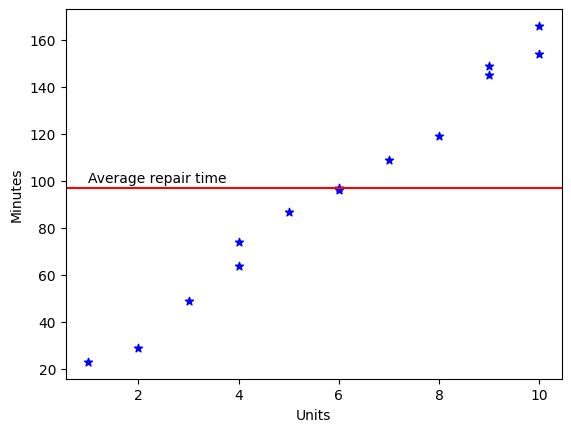

In [5]:
plt.scatter(data['Units'],data['Minutes'],color='blue',marker='*') #plotting actual time taken
plt.axhline(y=mean_value,color='red') #plotting mean, if it is axvline that would be x=mean_value
plt.annotate("Average repair time", xy=(1, mean_value+2.5)) #adding annotations, xlabel, ylabel
plt.xlabel("Units")
plt.ylabel("Minutes")
plt.show()

In [6]:
minutes_model1 = data['Minutes'].mean()
minutes_model2 = 10 + 12*data['Units'] #y=c+mx form where value of c and m are changed by us. y is target and x is feature
minutes_model3 = 6 + 18*data['Units']

In [7]:
print(minutes_model1)
print(minutes_model2)
print(minutes_model3)

97.21428571428571
0      22
1      34
2      46
3      58
4      58
5      70
6      82
7      82
8      94
9     106
10    118
11    118
12    130
13    130
Name: Units, dtype: int64
0      24
1      42
2      60
3      78
4      78
5      96
6     114
7     114
8     132
9     150
10    168
11    168
12    186
13    186
Name: Units, dtype: int64


In [8]:
data['Min_model1']=minutes_model1
data['Min_model2']=minutes_model2
data['Min_model3']=minutes_model3

In [9]:
data

,Units,Minutes,Min_model1,Min_model2,Min_model3
0,1,23,97.214286,22,24
1,2,29,97.214286,34,42
2,3,49,97.214286,46,60
3,4,64,97.214286,58,78
4,4,74,97.214286,58,78
5,5,87,97.214286,70,96
6,6,96,97.214286,82,114
7,6,97,97.214286,82,114
8,7,109,97.214286,94,132
9,8,119,97.214286,106,150


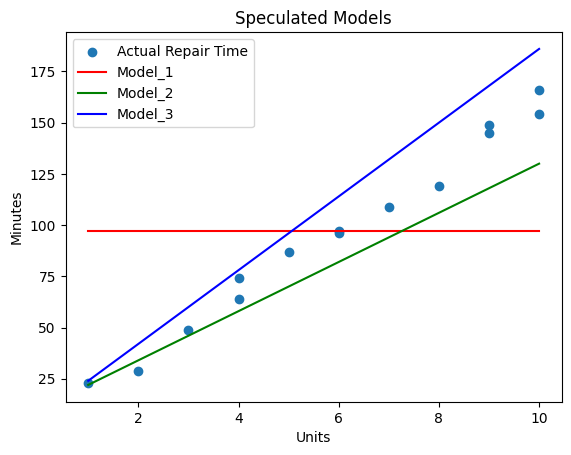

In [10]:
fig, ax = plt.subplots()
ax.scatter(x='Units',y='Minutes',data=data,label='Actual Repair Time') #plotting actual minutes
ax.plot(data['Units'],data['Min_model1'],color='red',label='Model_1') #plotting model 1 predictions
ax.plot(data['Units'],data['Min_model2'],color='green',label='Model_2') #plotting model 2 predictions
ax.plot(data['Units'],data['Min_model3'],color='blue',label='Model_3') #plotting model 3 predictions
ax.set_ylabel('Minutes')
ax.set_xlabel('Units')
ax.set_title('Speculated Models')
ax.legend()
plt.show()

In [11]:
model1_obs=pd.DataFrame({'Units':data['Units'],
                         'Actual Time':data['Minutes'],
                         'Predicted Time':data['Min_model1'],
                         'Error':(data.Min_model1-data.Minutes)})
model1_obs

,Units,Actual Time,Predicted Time,Error
0,1,23,97.214286,74.214286
1,2,29,97.214286,68.214286
2,3,49,97.214286,48.214286
3,4,64,97.214286,33.214286
4,4,74,97.214286,23.214286
5,5,87,97.214286,10.214286
6,6,96,97.214286,1.214286
7,6,97,97.214286,0.214286
8,7,109,97.214286,-11.785714
9,8,119,97.214286,-21.785714


In [12]:
sum(model1_obs['Error']**2) #total sum of squared errors, ** is exponential operator

27768.357142857145

In [13]:
model2_obs=pd.DataFrame({'Units':data['Units'],
                         'Actual Time':data['Minutes'],
                         'Predicted Time':data['Min_model2'],
                         'Error':(data.Min_model2-data.Minutes)})
model2_obs

,Units,Actual Time,Predicted Time,Error
0,1,23,22,-1
1,2,29,34,5
2,3,49,46,-3
3,4,64,58,-6
4,4,74,58,-16
5,5,87,70,-17
6,6,96,82,-14
7,6,97,82,-15
8,7,109,94,-15
9,8,119,106,-13


In [14]:
sum(model2_obs['Error']**2)

4993

In [15]:
model3_obs=pd.DataFrame({'Units':data['Units'],
                         'Actual Time':data['Minutes'],
                         'Predicted Time':data['Min_model3'],
                         'Error':(data.Min_model3-data.Minutes)})
model3_obs

,Units,Actual Time,Predicted Time,Error
0,1,23,24,1
1,2,29,42,13
2,3,49,60,11
3,4,64,78,14
4,4,74,78,4
5,5,87,96,9
6,6,96,114,18
7,6,97,114,17
8,7,109,132,23
9,8,119,150,31


In [16]:
sum(model3_obs['Error']**2)

5001

Total sum of sqaure least for model2

In [17]:
x=data.Units
y=data.Minutes

xy=x*y
n=len(data)

xmean=data.Units.mean()
ymean=data.Minutes.mean()

numerator=xy.sum()-n*xmean*ymean
denominator=(x**2).sum()-n*(xmean**2)

m=numerator/denominator
c=ymean - (m*xmean)

print('intercept-c:',c,'coefficient-m:',m)

intercept-c: 4.161654135338296 coefficient-m: 15.508771929824569


In [18]:
min_best_fit_model = c + m*data.Units
data['Min_best_fit_model'] = min_best_fit_model
data[['Units','Minutes','Min_best_fit_model']]

,Units,Minutes,Min_best_fit_model
0,1,23,19.670426
1,2,29,35.179198
2,3,49,50.687970
3,4,64,66.196742
4,4,74,66.196742
5,5,87,81.705514
6,6,96,97.214286
7,6,97,97.214286
8,7,109,112.723058
9,8,119,128.231830


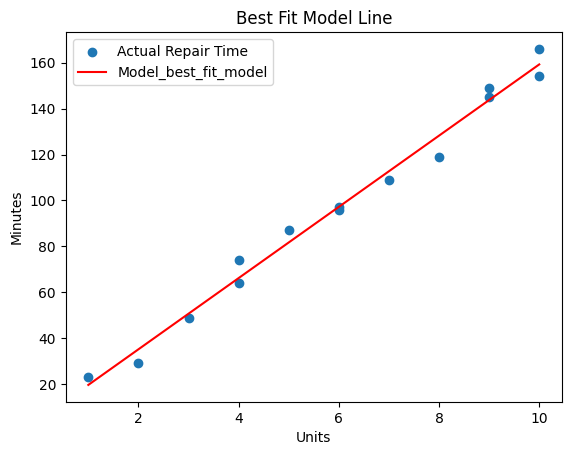

In [19]:
fig, ax = plt.subplots()
ax.scatter(x='Units',y='Minutes',data=data,label='Actual Repair Time') #plotting actual minutes
ax.plot(data['Units'],data['Min_best_fit_model'],color='red',label='Model_best_fit_model') #plotting best fit model predictions
ax.set_ylabel('Minutes')
ax.set_xlabel('Units')
ax.set_title('Best Fit Model Line')
ax.legend()
plt.show()

In [20]:
model_best_obs=pd.DataFrame({'Units':data['Units'],
                         'Actual Time':data['Minutes'],
                         'Predicted Time':data['Min_best_fit_model'],
                         'Error':(data.Min_best_fit_model-data.Minutes)})
model_best_obs

,Units,Actual Time,Predicted Time,Error
0,1,23,19.670426,-3.329574
1,2,29,35.179198,6.179198
2,3,49,50.687970,1.687970
3,4,64,66.196742,2.196742
4,4,74,66.196742,-7.803258
5,5,87,81.705514,-5.294486
6,6,96,97.214286,1.214286
7,6,97,97.214286,0.214286
8,7,109,112.723058,3.723058
9,8,119,128.231830,9.231830


In [21]:
sum(model_best_obs['Error']**2)

348.848370927318

In [22]:
data['Units']

0      1
1      2
2      3
3      4
4      4
5      5
6      6
7      6
8      7
9      8
10     9
11     9
12    10
13    10
Name: Units, dtype: int64

Linear regression by definition takes an array as x input, therefore we need to convert each element into an array

In [23]:
np.array(data['Units']).reshape(-1,1)

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 4],
       [ 5],
       [ 6],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [ 9],
       [10],
       [10]])

In [24]:
x = np.array(data['Units']).reshape(-1,1)
y= data['Minutes']

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x,y)

LinearRegression()

In [25]:
print('Intercept:',model.intercept_)
print('Coefficients',model.coef_)

Intercept: 4.161654135338296
Coefficients [15.50877193]


same values for both manual and automatic process

In [31]:
SST = sum((data.Minutes - data.Minutes.mean())**2)
SST

27768.357142857145

In [28]:
SSE = sum(model_best_obs.Error**2) #sum of squared error
SSE

348.848370927318

In [32]:
SSR = SST - SSE
SSR

27419.508771929828

In [33]:
Rsq = SSR/SST
Rsq

0.9874371980620736

In [34]:
Rsq1 = model.score(data[['Units']],y)
Rsq1

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.9874371980620736